In [1]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     ---------- ----------------------------- 0.8/3.0 MB 2.6 MB/s eta 0:00:01
     ----------------- ---------------------- 1.3/3.0 MB 2.6 MB/s eta 0:00:01
     --------------------------- ------------ 2.1/3.0 MB 2.6 MB/s eta 0:00:01
     ---------------------------------- ----- 2.6/3.0 MB 2.6 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 2.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-

In [2]:
# If you're running this for the first time, install yfinance
!pip install yfinance

# Import required libraries
import yfinance as yf          # To get stock market data
import pandas as pd            # For data analysis
import matplotlib.pyplot as plt  # For plotting graphs


Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Define the stock symbol and time period
ticker = 'NVDA'  # Nvidia's stock ticker
start_date = '2022-04-01'
end_date = '2024-04-01'

# Download the data
nvda_data = yf.download(ticker, start=start_date, end=end_date)

# Show the first 5 rows of the dataset
nvda_data.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2022-04-01,26.669741,27.452501,26.225445,27.331692,517235000
2022-04-04,27.316715,27.514402,26.570897,26.685715,397120000
2022-04-05,25.889973,27.275777,25.779148,27.210879,436615000
2022-04-06,24.368387,25.259974,23.965027,24.894554,703833000
2022-04-07,24.169704,24.682891,23.440860,24.402336,557992000


In [4]:
# Check the shape (rows, columns)
print("Shape of dataset:", nvda_data.shape)

# Check column names
print("\nColumn names:", nvda_data.columns)

# Check for missing values
print("\nMissing values per column:")
print(nvda_data.isnull().sum())

# Summary statistics
nvda_data.describe()


Shape of dataset: (500, 5)

Column names: MultiIndex([( 'Close', 'NVDA'),
            (  'High', 'NVDA'),
            (   'Low', 'NVDA'),
            (  'Open', 'NVDA'),
            ('Volume', 'NVDA')],
           names=['Price', 'Ticker'])

Missing values per column:
Price   Ticker
Close   NVDA      0
High    NVDA      0
Low     NVDA      0
Open    NVDA      0
Volume  NVDA      0
dtype: int64


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
count,500.000000,500.000000,500.000000,500.000000,5.000000e+02
mean,33.317708,33.890996,32.658230,33.272084,5.093713e+08
std,19.660459,19.967954,19.297486,19.658264,1.534407e+08
min,11.214938,11.722392,10.801385,10.959215,1.679340e+08
25%,16.964211,17.382375,16.616837,16.955223,4.026180e+08
50%,26.812586,27.197336,26.393858,26.815586,4.805600e+08
75%,45.553138,46.167496,44.893019,45.686588,5.831480e+08
max,94.970787,97.368012,93.479280,95.819506,1.543911e+09


In [5]:
# Flatten the MultiIndex column names
nvda_data.columns = nvda_data.columns.droplevel(1)

# Confirm the new column names
print(nvda_data.columns)


Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


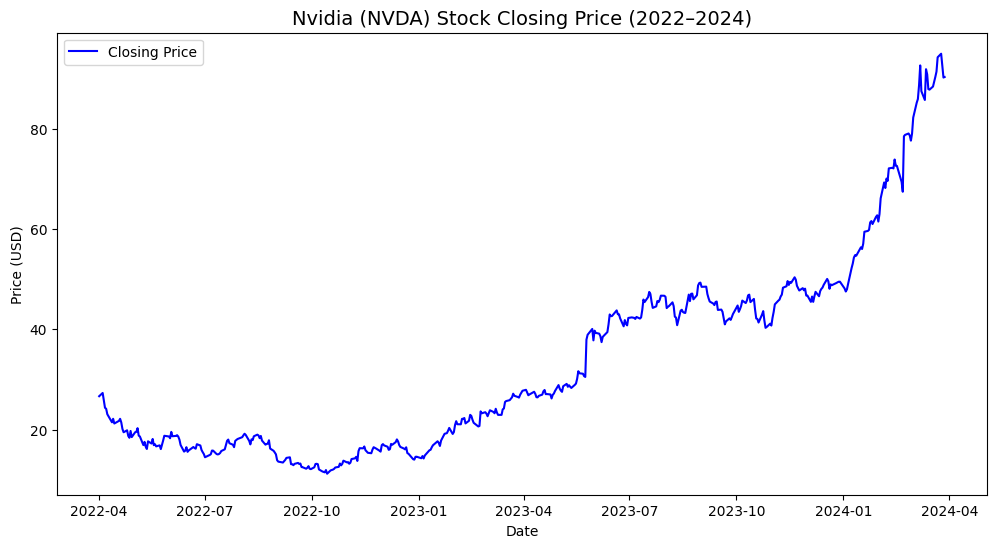

In [8]:
# Set the chart size (optional, just makes it bigger)
plt.figure(figsize=(12, 6))

# Plot the closing price over time
plt.plot(nvda_data.index, nvda_data['Close'], label='Closing Price', color='blue')

# Add title and labels
plt.title('Nvidia (NVDA) Stock Closing Price (2022–2024)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Show the legend
plt.legend()

plt.savefig('plots/nvda_closing_price.png', dpi=300)

# Display the plot
plt.show()


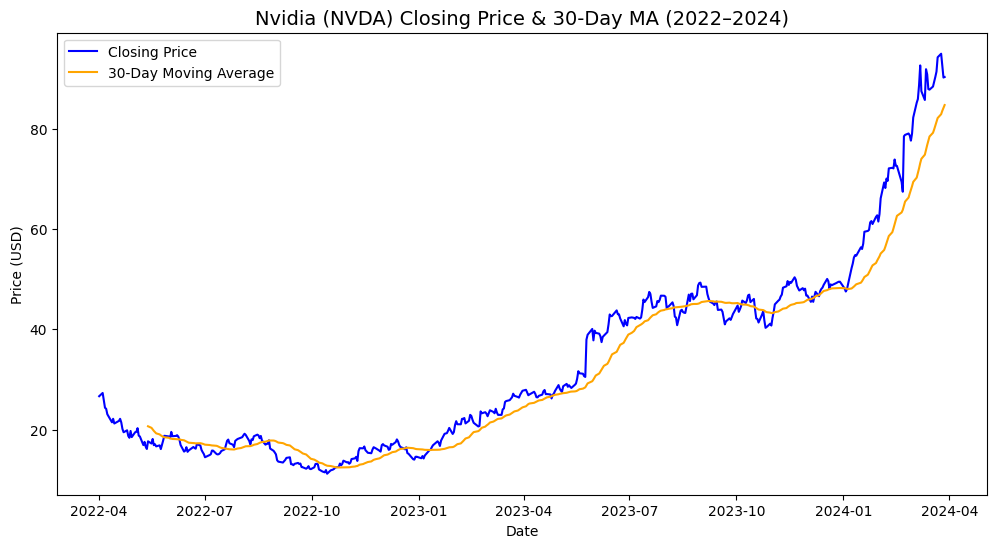

In [9]:
# Calculate the 30-day moving average and add it as a new column
nvda_data['MA_30'] = nvda_data['Close'].rolling(window=30).mean()

# Plot the closing price and the 30-day moving average
plt.figure(figsize=(12, 6))

plt.plot(nvda_data.index, nvda_data['Close'], label='Closing Price', color='blue')
plt.plot(nvda_data.index, nvda_data['MA_30'], label='30-Day Moving Average', color='orange')

plt.title('Nvidia (NVDA) Closing Price & 30-Day MA (2022–2024)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.savefig('plots/nvda_price_with_ma.png', dpi=300)

plt.show()


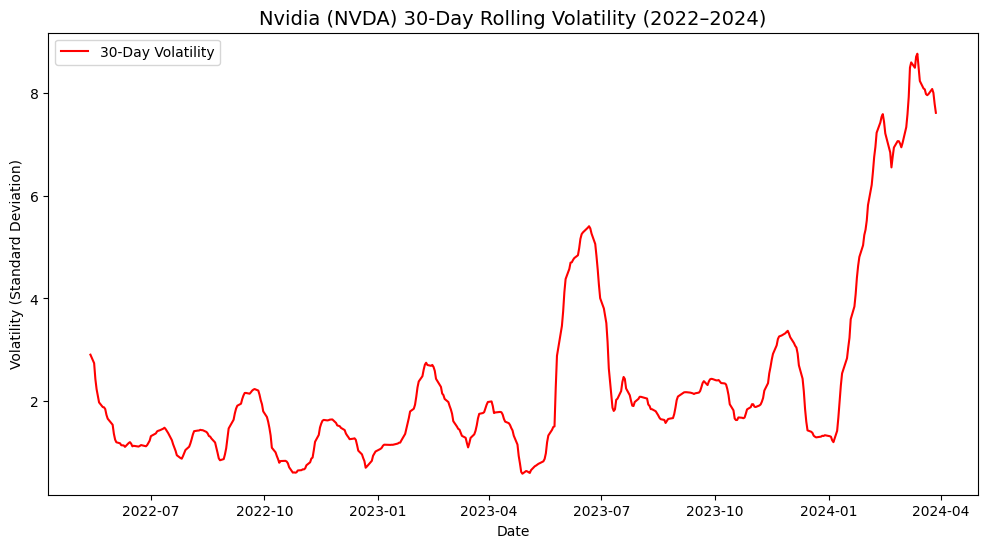

In [10]:
# Calculate 30-day rolling volatility (standard deviation)
nvda_data['Volatility_30'] = nvda_data['Close'].rolling(window=30).std()

# Plot the volatility over time
plt.figure(figsize=(12, 6))

plt.plot(nvda_data.index, nvda_data['Volatility_30'], label='30-Day Volatility', color='red')

plt.title('Nvidia (NVDA) 30-Day Rolling Volatility (2022–2024)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation)')
plt.legend()

# Save the plot
plt.savefig('plots/nvda_30day_volatility.png', dpi=300)

# Show the plot
plt.show()


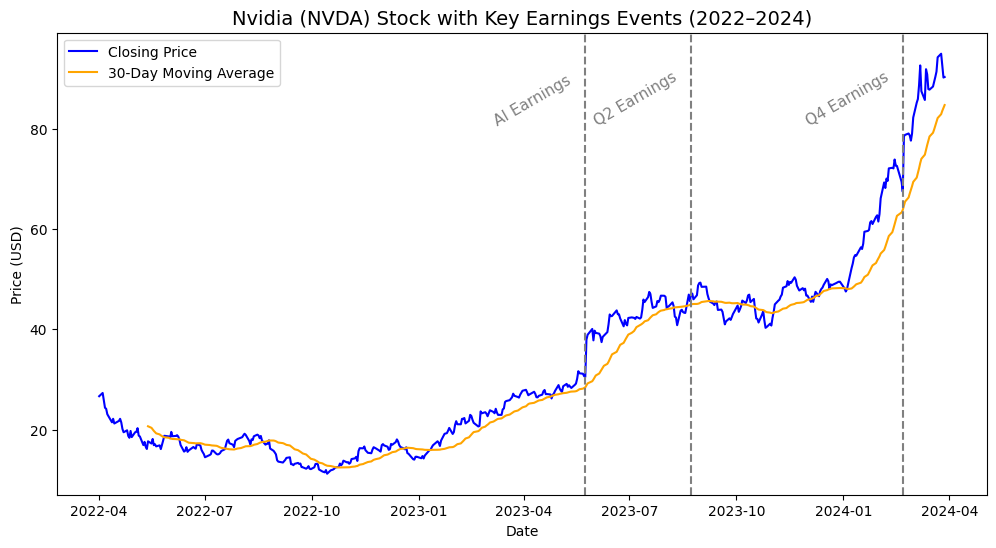

In [14]:
import pandas as pd

# Convert annotation dates to datetime format
event_dates = {
    '2023-05-24': 'AI Earnings',
    '2023-08-23': 'Q2 Earnings',
    '2024-02-21': 'Q4 Earnings'
}

plt.figure(figsize=(12, 6))

# Plot price and moving average
plt.plot(nvda_data.index, nvda_data['Close'], label='Closing Price', color='blue')
plt.plot(nvda_data.index, nvda_data['MA_30'], label='30-Day Moving Average', color='orange')

# Loop through events and annotate
for date_str, label in event_dates.items():
    date = pd.to_datetime(date_str)
    plt.axvline(x=date, color='gray', linestyle='--')
    
    # Shift text to the left
    text_x = date - pd.Timedelta(days=10)
    
    plt.text(
        x=text_x,
        y=nvda_data['Close'].max() * 0.85,
        s=label,
        rotation=30,              # ← slight diagonal
        color='gray',
        fontsize=11,
        ha='right'
    )


# Final touches
plt.title('Nvidia (NVDA) Stock with Key Earnings Events (2022–2024)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

# Save the plot
plt.savefig('plots/nvda_annotated_events.png', dpi=300)

# Show plot
plt.show()
